<a href="https://colab.research.google.com/github/from-iqwerty-import-IQ/Deep_Learning_Projects/blob/main/Dog%20breed%20prediction/Developing%20Model/Train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp


100% 689M/691M [00:04<00:00, 113MB/s]
100% 691M/691M [00:04<00:00, 157MB/s]


In [5]:
%%capture
!unzip \*.zip && rm *.zip &> /dev/null

In [6]:
# Important library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
labels_all = pd.read_csv("/content/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [34]:
# Visualize the number of each breeds
breeds_all = labels_all["breed"]

breed_counts = breeds_all.value_counts()
print(breed_counts.head(50))

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
pomeranian              111
great_pyrenees          111
basenji                 110
samoyed                 109
airedale                107
tibetan_terrier         107
cairn                   106
leonberg                106
japanese_spaniel        105
beagle                  105
miniature_pinscher      102
australian_terrier      102
blenheim_spaniel        102
irish_wolfhound         101
lakeland_terrier         99
saluki                   99
papillon                 96
whippet                  95
siberian_husky           95
norwegian_elkhound       95
pug                      94
chow                     93
italian_greyhound        92
pembroke                 92
newfoundland             91
ibizan_hound             91
border_terrier           91
silky_terrier            90
lhasa                    90
dandie_dinmont      

In [45]:
# Selecting first 3 breeds (Limitation due to computation power)
CLASS_NAMES = ['maltese_dog','pug','pomeranian','labrador_retriever']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
1,31,00cc68a50b2d016a6b29af628ea4e04b,labrador_retriever
2,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
3,92,023e4e28415506e0deddcbd8f8bdab29,pug
4,97,02508e76981e1ba059d785704b4c480c,pug


In [46]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('/content/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 406/406 [00:01<00:00, 307.74it/s]


Train Images shape:  (406, 224, 224, 3)  size: 61,114,368
One-hot encoded output shape:  (406, 4)  size: 1,624


In [47]:
# Building the Model
model = Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [51]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [ ]:
# data augmentation


In [52]:
# Training the model
epochs = 50
batch_size = 128

history = model.fit(X_train, Y_train, 
                    
                    epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/50
10/10 [==============================] - 1s 60ms/step - loss: 1.2945 - accuracy: 0.7774 - val_loss: 1.2890 - val_accuracy: 0.5342
Epoch 2/50
10/10 [==============================] - 1s 58ms/step - loss: 0.6104 - accuracy: 0.8185 - val_loss: 0.8254 - val_accuracy: 0.6849
Epoch 3/50
10/10 [==============================] - 1s 59ms/step - loss: 0.4766 - accuracy: 0.8733 - val_loss: 0.6283 - val_accuracy: 0.7671
Epoch 4/50
10/10 [==============================] - 1s 59ms/step - loss: 0.3254 - accuracy: 0.9075 - val_loss: 0.8044 - val_accuracy: 0.7397
Epoch 5/50
10/10 [==============================] - 1s 59ms/step - loss: 0.3400 - accuracy: 0.8801 - val_loss: 0.4815 - val_accuracy: 0.7945
Epoch 6/50
10/10 [==============================] - 1s 59ms/step - loss: 0.2131 - accuracy: 0.9418 - val_loss: 0.4377 - val_accuracy: 0.8630
Epoch 7/50
10/10 [==============================] - 1s 59ms/step - loss: 0.1353 - accuracy: 0.9658 - val_loss: 0.3447 - val_accuracy: 0.8493
Epoch 8/50
10

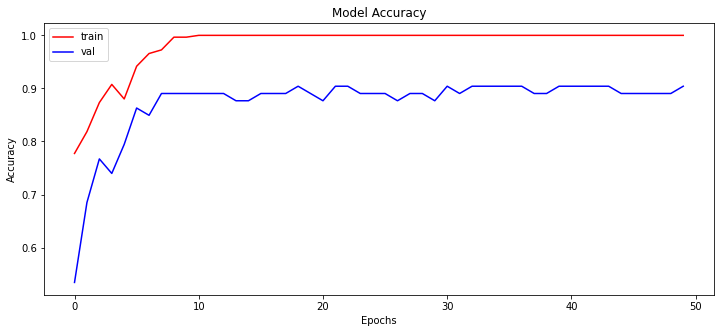

In [53]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [54]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 10ms/step - loss: 1.1668 - accuracy: 0.8049
Accuracy over the test set: 
  80.49 %


In [55]:
print(len(X_test))

41


34


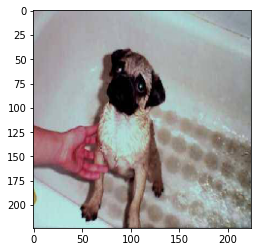

Originally :  labrador_retriever
Predicted :  labrador_retriever


In [56]:
no = int(input())
plt.imshow(X_test[no,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[no])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[no])])

In [58]:
model.save('dog_80.h5')